# <span style="color:red"> Lezione 8 </span>

## <span style="color:green"> Esercizio 8.1 </span>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

X ,Y = np.loadtxt("8.1/data/funz_try.dat", usecols=(0,1), delimiter=' ', unpack='true')
Funz = np.loadtxt("8.1/data/Funz.norm", usecols=(0), delimiter=' ', unpack='true')

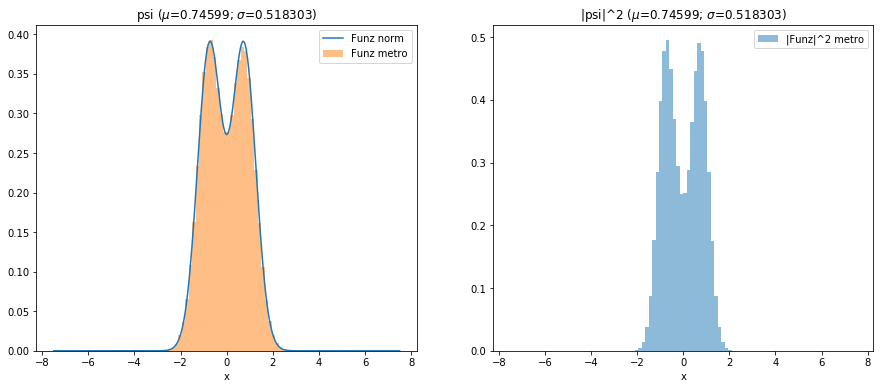

In [7]:
mu = 0.74599
sigma = 0.518303
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,6),gridspec_kw=dict(wspace=0.2, hspace=0.5))
F = np.linspace(-7.5,7.5,301)
ax[0].plot(F,Funz/2.598,label='Funz norm')
ax[0].hist(Y,density=True,alpha=0.5,bins=100,range=(-7.5,7.5), label='Funz metro')
ax[0].set_title(f'psi ($\mu$={mu}; $\sigma$={sigma})')
ax[0].set_xlabel('x')
ax[0].legend()
ax[1].hist(X,density=True,alpha=0.5,bins=100,range=(-7.5,7.5), label='|Funz|^2 metro')
ax[1].set_title(f'|psi|^2 ($\mu$={mu}; $\sigma$={sigma})')
ax[1].set_xlabel('x')
ax[1].legend()

Possiamo vedere qui la distribuzione, data da $|\Psi_T(x)|^2$, con:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

opportunamente normalizzata. Infatti quando plottiamo l'istogramma con `density=True` matplotlib gli fornisce un'area unitaria. Per la normalizzazione ho calcolato a parte il valore dell'integrale di $\psi_T(x)$. Per la `funz norm` ho calcolato i valori sempre di $\psi_T(x)$ nell'intervallo $(-7.5,7.5)$.

## <span style="color:green"> Esercizio 8.2 </span>

Per l'ottimizzazione per una serie di problemi, ho preferito procedere manualmente cercando i valori di $\mu$ e $\sigma$ che permettessero la migliore "eguaglianza tra i due grafici. 

Ground state energy:  -0.4604658796927149
1st excited state energy:  0.09742471331761227
2nd excited state energy:  1.971733134393021


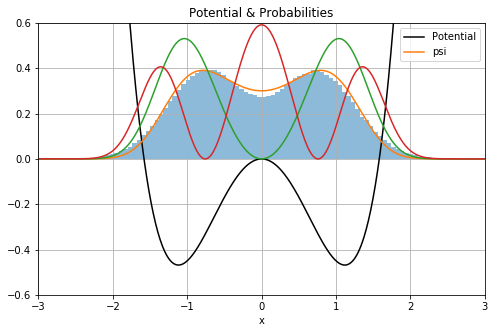

In [31]:
import numpy as np
import matplotlib.pyplot as plt

X, Y = np.loadtxt("8.2/data/funz_try.dat", usecols=(0,1), delimiter=' ', unpack='true')

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.hist(Y,density=True,alpha=0.5,bins=100,range=(-3,3))
plt.plot(x,(psi[0])**2,label='psi')
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

Ora comparo, come già fatto per $\psi_T(x)$ in 8.1, l'andamento di $|\psi_T(x)|^2$ analitico e metropolis. Siccome l'istogramma, presenta il comando `density=True`, ha area = 1. Quindi anche la funzione analitica, ha bisogno di essere normalizzata e per farlo mi sono calcolato l'integrale a parte.

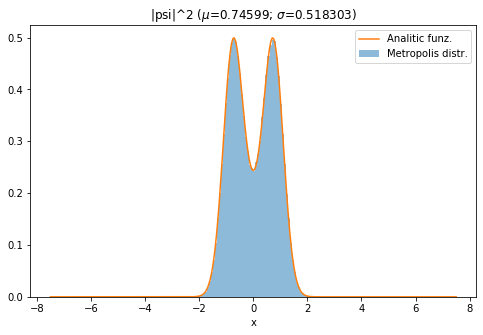

In [8]:
# loading analitic funz
Funz2 = np.loadtxt("8.2/data/Funz.norm", usecols=(0), delimiter=' ', unpack='true')
#plotting
plt.figure(figsize=(8,5))
plt.hist(X,density=True,alpha=0.5, bins=200,range=(-7.5,7.5), label='Metropolis distr.')
F = np.linspace(-7.5,7.5,301)
plt.plot(F, Funz2/2.069, label='Analitic funz.')
plt.title(f'|psi|^2 ($\mu$={mu}; $\sigma$={sigma})')
plt.xlabel('x')
plt.legend()
plt.show()

Ora mostriamo l'andamento progressi di $\langle {\hat H} \rangle_T$ in funzione del numero di blocchi con le loro incertezze. Notiamo che si discorsta del valore atteso, ma questo ce lo aspettiamo in quanto stiamo usando una funzione prova con parametri non esatti.

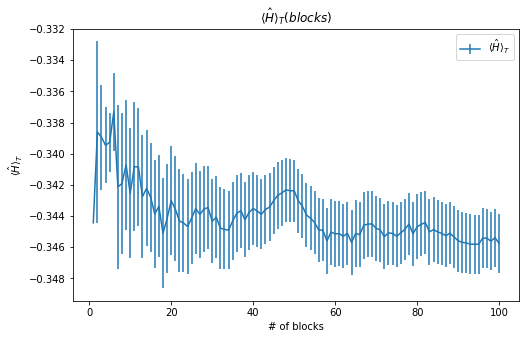

In [10]:
# loading H and its uncertainties
H, err_H = np.loadtxt("8.2/data/output.blk", usecols=(0,1), delimiter=' ', unpack='true')
plt.figure(figsize=(8,5))
b = np.linspace(1,100,100)
plt.errorbar(b, H, yerr=err_H, label=r'$\langle {\hat H} \rangle_T$')
#plt.axhline(y=-0.4604658796927149)
plt.title(r'$\langle {\hat H} \rangle_T(blocks)$')
plt.xlabel('# of blocks')
plt.ylabel(r'$\langle {\hat H} \rangle_T$')
plt.legend()
plt.show()

## <span style="color:green"> Esercizio 8.3</span>

Ora usiamo i codice fornitoci e confrontiamo i risultati. Ho modificato il potenziale ext (con le sue derivate), e aggiunto $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$. Per i risultati ho prima studiato il caso con $T=0$, algoritmo PIGS. Per salvare i file in modo diverso dopo l'esecuzione li ho rinominati (in modo da non modificare il codice già presente):
* `probability_cost_0` ---> $\Psi_T(x)=1$ e $T=0$
* `probability_0.dat` ---> $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$

Il tempo immaginario sotto il valore 3 non fornisce più un'accettanza compresa in (40%,60%). In questo caso è stato usato pari a 4.5

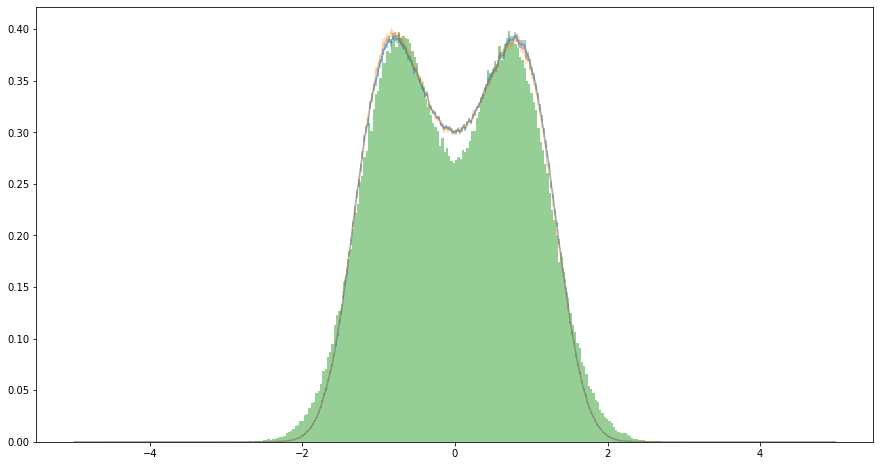

In [11]:
# loading files
x_C0, prob_C0, err_pC0 = np.loadtxt("8.3/probability_cost_0.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
x_0, prob_0, err_p0 = np.loadtxt("8.3/probability_0.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
#plotting
plt.figure(figsize=(15,8))
plt.errorbar(x_C0, prob_C0, yerr=err_pC0, alpha=0.5, label='Metropolis distr.')
plt.errorbar(x_0, prob_0, yerr=err_p0, alpha=0.3, label='')
plt.hist(Y,density=True,alpha=0.5,bins=200,range=(-3,3))
plt.show()

Ora invece studiamo il caso in cui $T!=0$, in particolare usiamo l'algoritmo PIMC, dove $T=1.25$.Per salvare i file in modo diverso dopo l'esecuzione li ho rinominati (in modo da non modificare il codice già presente):
* `probability_cost_T` ---> $\Psi_T(x)=1$ e $T=0$
* `probability_T.dat` ---> $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$

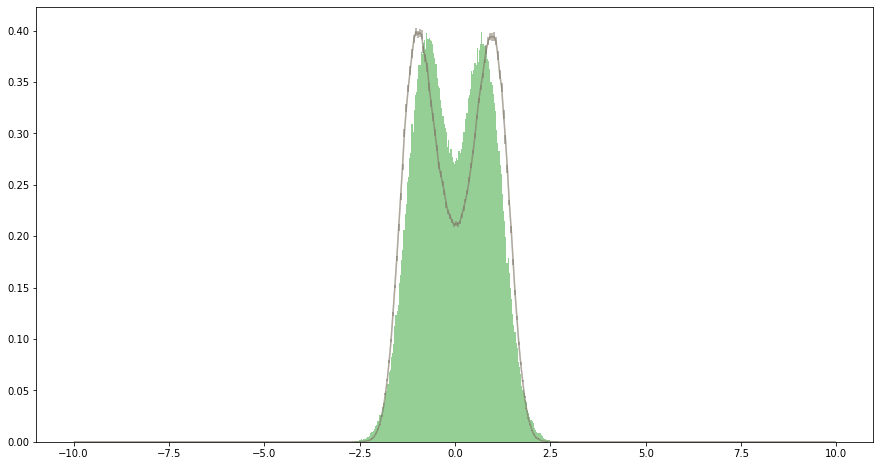

In [13]:
x_CT, prob_CT, err_pCT = np.loadtxt("8.3/probability_cost_T.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
x_T, prob_T, err_pT = np.loadtxt("8.3/probability_T.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
#plotting
plt.figure(figsize=(15,8))
plt.errorbar(x_CT, prob_CT, yerr=err_pCT, alpha=0.5, label='Metropolis distr.')
plt.errorbar(x_T, prob_T, yerr=err_pT, alpha=0.3, label='')
plt.hist(Y,density=True,alpha=0.5,bins=200,range=(-3,3))
plt.show()

<span style="color:red">Chiedere cosa del tempo immaginario e se bisogna aggiungere altro</span>